In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
df = pd.read_csv("AirQuality.csv", delimiter=";", low_memory=False)

In [18]:
df

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Datetime,AQI_Estimated
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2023-03-10 18:00:00,82.5
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2023-03-10 19:00:00,66.0
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2023-03-10 20:00:00,79.0
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2023-03-10 21:00:00,83.0
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2023-03-10 22:00:00,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,2.2,1071.0,-200.0,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028,2024-04-04 14:00:00,106.0
9467,2.2,1071.0,-200.0,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028,2024-04-04 14:00:00,106.0
9468,2.2,1071.0,-200.0,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028,2024-04-04 14:00:00,106.0
9469,2.2,1071.0,-200.0,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028,2024-04-04 14:00:00,106.0


In [4]:
df = df.applymap(lambda x: str(x).replace(',', '.') if isinstance(x, str) else x)
numeric_columns = df.columns[2:-2]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
df.fillna(method='ffill', inplace=True)
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H.%M.%S')
df = df.drop(columns=['Date', 'Time', 'Unnamed: 15', 'Unnamed: 16'])

C:\Users\91702\AppData\Local\Temp\ipykernel_8012\1234685077.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: str(x).replace(',', '.') if isinstance(x, str) else x)
C:\Users\91702\AppData\Local\Temp\ipykernel_8012\1234685077.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [5]:
df['Datetime'] = df['Datetime'] + pd.DateOffset(years=19)
df_2025 = df.copy()
df_2025['Datetime'] = df_2025['Datetime'] + pd.DateOffset(years=1)

In [6]:
df["AQI_Estimated"] = (df["NO2(GT)"] * 0.5) + (df["CO(GT)"] * 10)
df_2025["AQI_Estimated"] = df["AQI_Estimated"] * np.random.uniform(0.9, 1.1) 

In [7]:
features = ['CO(GT)', 'NO2(GT)', 'T', 'RH', 'PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)']
target = 'AQI_Estimated'

In [8]:
train, test = train_test_split(df, test_size=0.2, shuffle=False, random_state=42)
X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]

In [9]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [10]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred_rf = rf_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)

In [12]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [13]:
print(f"Random Forest - Mean Absolute Error: {mae_rf}, R² Score: {r2_rf}")
print(f"Linear Regression - Mean Absolute Error: {mae_lr}, R² Score: {r2_lr}")

Random Forest - Mean Absolute Error: 1.3141213720316618, R² Score: 0.9999382324334378
Linear Regression - Mean Absolute Error: 5.173672572150484e-12, R² Score: 1.0


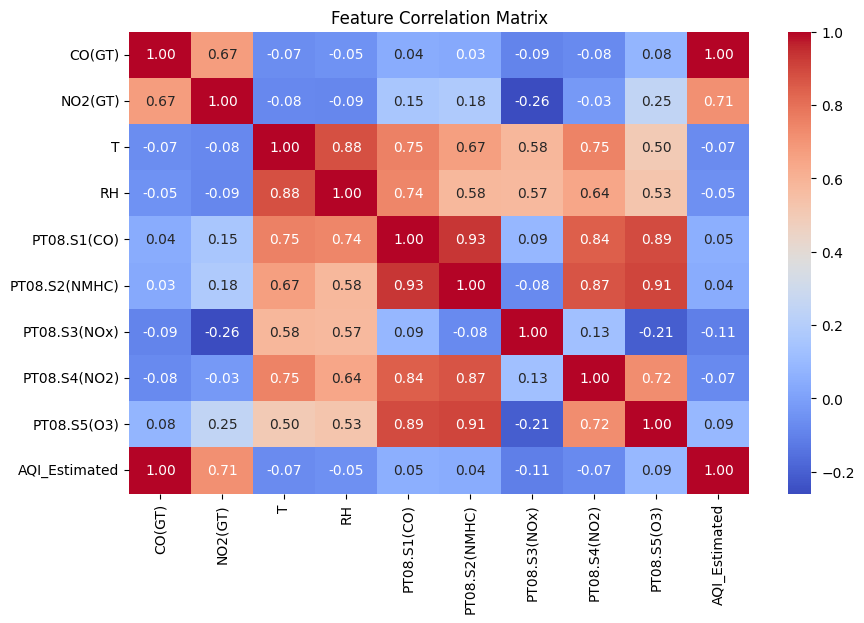

In [14]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[features + [target]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

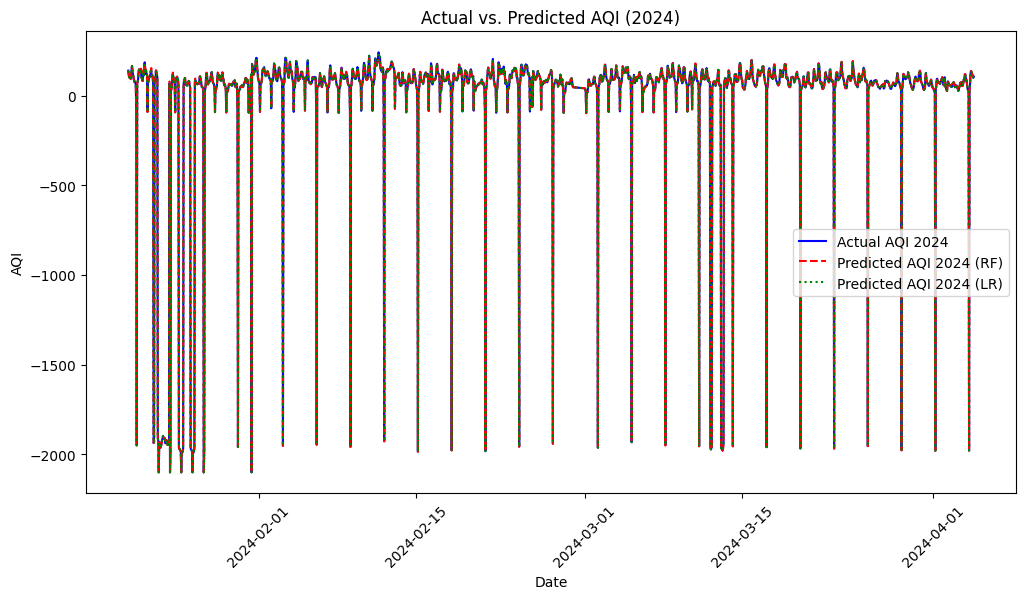

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(test["Datetime"], y_test, label="Actual AQI 2024", color="blue")
plt.plot(test["Datetime"], y_pred_rf, label="Predicted AQI 2024 (RF)", color="red", linestyle="dashed")
plt.plot(test["Datetime"], y_pred_lr, label="Predicted AQI 2024 (LR)", color="green", linestyle="dotted")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.title("Actual vs. Predicted AQI (2024)")
plt.legend()
plt.xticks(rotation=45)
plt.show()

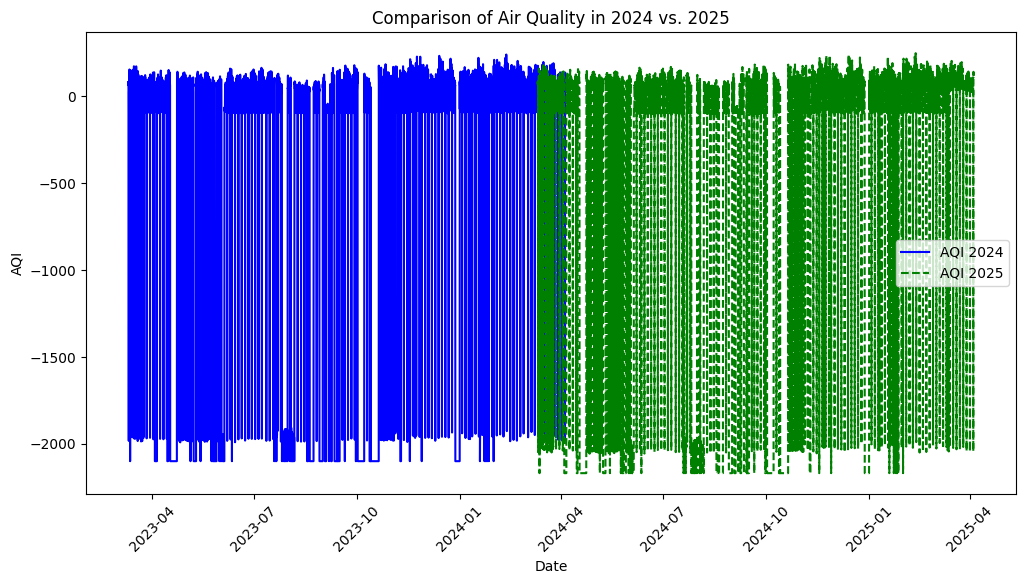

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(df["Datetime"], df["AQI_Estimated"], label="AQI 2024", color="blue")
plt.plot(df_2025["Datetime"], df_2025["AQI_Estimated"], label="AQI 2025", color="green", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.title("Comparison of Air Quality in 2024 vs. 2025")
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [17]:
comparison_df = test[['Datetime', 'AQI_Estimated']].copy()
comparison_df['Predicted_AQI_RF'] = y_pred_rf
comparison_df['Predicted_AQI_LR'] = y_pred_lr
print(comparison_df.head(10))

                Datetime  AQI_Estimated  Predicted_AQI_RF  Predicted_AQI_LR
7576 2024-01-20 10:00:00          139.0           139.575             139.0
7577 2024-01-20 11:00:00          114.0           113.615             114.0
7578 2024-01-20 12:00:00          101.5           101.025             101.5
7579 2024-01-20 13:00:00          101.0           100.645             101.0
7580 2024-01-20 14:00:00          107.0           107.170             107.0
7581 2024-01-20 15:00:00           93.0            92.630              93.0
7582 2024-01-20 16:00:00          113.5           112.825             113.5
7583 2024-01-20 17:00:00          147.0           147.035             147.0
7584 2024-01-20 18:00:00          165.0           163.970             165.0
7585 2024-01-20 19:00:00          134.0           134.150             134.0
